# Chapter 7 – Python利率与债券分析

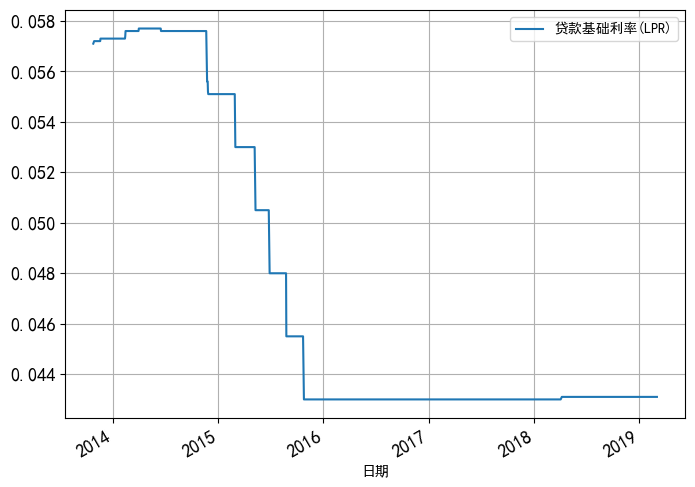

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
# LPR：贷款基础利率
LPR = pd.read_excel(r'FigureData\data\chapter7\贷款基础利率（LPR）数据.xls', sheet_name="Sheet1",header=0,index_col=0) #导入外部数据
LPR.plot(figsize=(8,6), grid=True, fontsize = 13) #数据可视化
plt.show()

<Axes: xlabel='日期'>

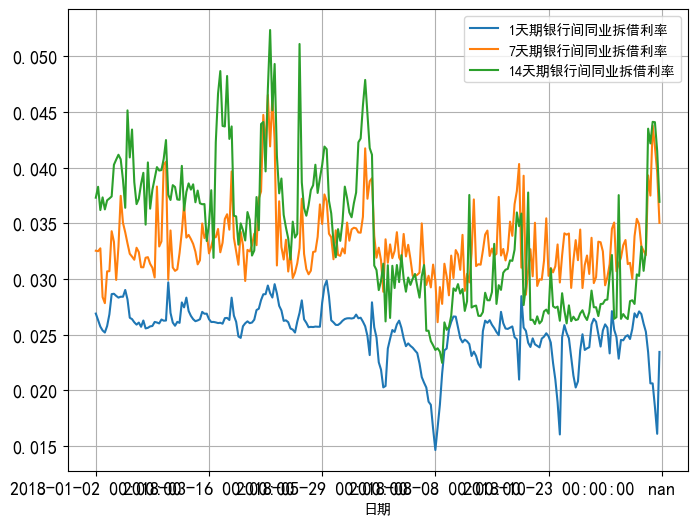

In [3]:
# IBL：银行间同业拆借利率
IBL = pd.read_excel(r'FigureData\data\chapter7\银行间同业拆借利率（2018年）.xls',sheet_name="Sheet1",header=0,index_col=0) #导入外部数据
(IBL.iloc[:,0:3]).plot(figsize=(8,6),grid = True,fontsize = 13) #数据可视化

<Axes: xlabel='日期'>

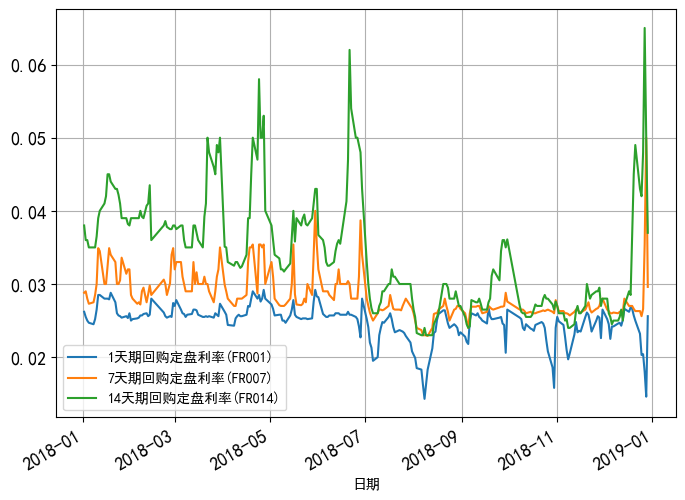

In [5]:
# FR：银行间回购定盘利率
FR = pd.read_excel(r'FigureData\data\chapter7\银行间回购定盘利率（2018年）.xls',sheet_name="Sheet1",header=0,index_col=0) #导入外部数据
FR.plot(figsize=(8,6),grid = True,fontsize = 13) #数据可视化

<Axes: xlabel='日期'>

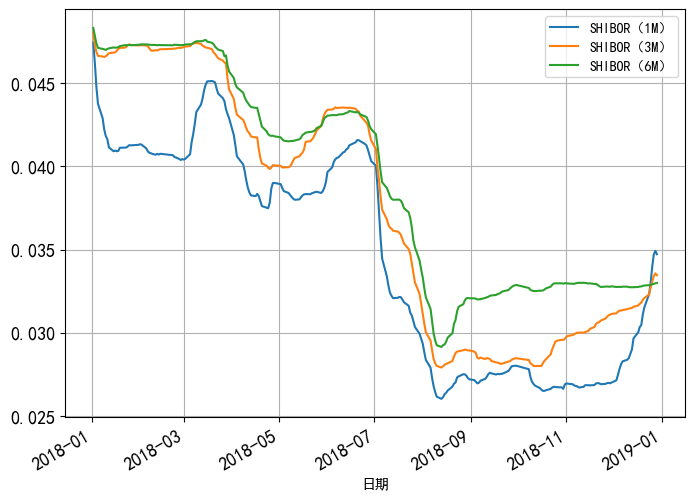

In [7]:
# Shibor：上海银行间同业拆借利率
Shibor = pd.read_excel(r'FigureData\data\chapter7\Shibor利率（2018年）.xls',sheet_name="Sheet1",header=0,index_col=0) #导入外部数据
(Shibor.iloc[:,3:6]).plot(figsize=(8,6),grid = True,fontsize = 13) #数据可视化

Text(0.5, 1.0, '2018年国内债券在不同市场分布情况')

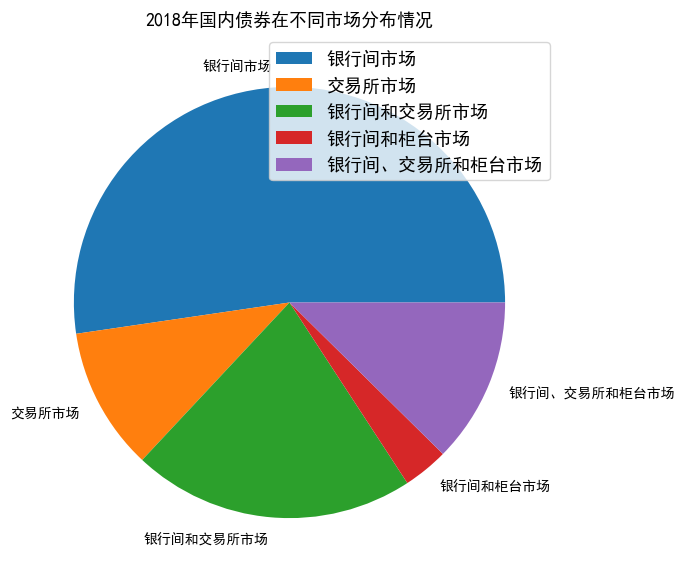

In [8]:
bond = pd.read_excel(r'FigureData\data\chapter7\国内债券市场按照交易场所分类（2018年末）.xlsx',sheet_name="Sheet1",header=0,index_col=0) #导入外部数据
plt.figure(figsize=(9,7))
plt.pie(x=bond['债券余额(亿元)'],labels=bond.index)
plt.legend(loc=1,fontsize=13)
plt.title(u'2018年国内债券在不同市场分布情况',fontsize=13)

In [9]:
r=0.02 #一年期利率2%
M=[1,2,4,12,52,365] #不同复利的频次
name=['一年复利1次','每半年复利1次','每季度复利1次','每月复利1次','每周复利1次','每天复利1次'] #建立一个包含不同复利频次的字符串列表
value=[] #建立一个初始的存放一年后的本息合计数的数列
i=0 #设置一个标量
for m in M:
    value.append(100*(1+r/m)**m)
    print(name[i],round(value[i],4))
    i=i+1

一年复利1次 102.0
每半年复利1次 102.01
每季度复利1次 102.0151
每月复利1次 102.0184
每周复利1次 102.0197
每天复利1次 102.0201


In [10]:
def FV(A,n,R,m):
    '''构建一个用于计算不同复利频次的投资终值函数
    A：表示初始的投资本金；
    n：表示投资期限（年）；
    R：表示年利率R是按年复利的利率；
    m：表示每年复利频次，输入Y代表1年复利1次，S代表每半年复利一次，
    Q代表每季度复利一次，M代表每月复利一次，W代表每周复利一次，
    D代表每天复利一次'''
    import numpy as np
    if m=='Y':
        return A*(1+R)**(n)
    elif m=='S':
        return A*(1+R/2)**(n*2)
    elif m=='Q':
        return A*(1+R/4)**(n*4)
    elif m=='M':
        return A*(1+R/12)**(n*12)
    elif m=='W':
        return A*(1+R/52)**(n*52)
    else:
        return A*(1+R/365)**(n*365)
FV_M=FV(A=100,n=1,R=0.02,m='M') #用于验证每月复利的结果
print('每月复利1次得到的本息和',round(FV_M,4))

每月复利1次得到的本息和 102.0184


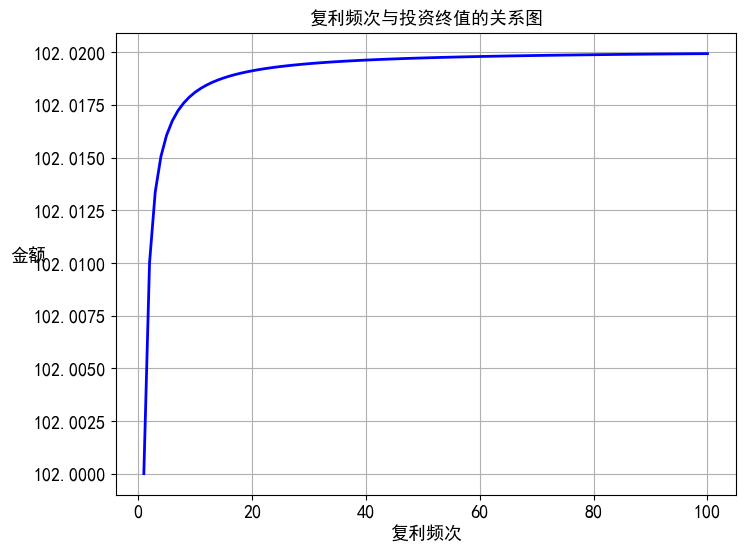

In [11]:
r=0.02 #复利一次的年利率2%
M=np.arange(1,101) #生成从1到100的自然数数列
PV=100 #初始投资100元
FV=PV*(1+r/M)**M #计算投资终值
plt.figure(figsize=(8,6))
plt.plot(M,FV,'b-',lw=2.0)
plt.xlabel(u'复利频次',fontsize =13)
plt.ylabel(u'金额',fontsize =13,rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'复利频次与投资终值的关系图',fontsize=13)
plt.grid('True')
plt.show()

In [12]:
def Rc(Rm,m):
    '''构建已知复利频次和对应的复利利率，计算
    等价连续复利利率的函数
    Rm：代表了复利频次m的复利利率
    m：代表了复利频次。'''
    import numpy as np #导入Numpy模块
    return m*np.log(1+Rm/m) #输出等价的连续复利利率结果

def Rm(Rc,m):
    '''构建已知复利频次和连续复利利率，计算等价的
    对应复利m次复利利率函数
    Rc：代表了连续复利利率
    m：代表了复利频次。'''
    import numpy as np #导入Numpy模块
    return m*(np.exp(Rc/m)-1) #输出等价的对应复利频次的复利利率结果b

R_c=Rc(Rm=0.05,m=4.) #计算连续复利利率
print('等价的连续复利利率',round(R_c,6))

R_m=Rm(Rc=0.06,m=12) #计算按月复利的复利利率
print('等价的按月复利的复利利率',round(R_m,6))

等价的连续复利利率 0.04969
等价的按月复利的复利利率 0.06015


In [13]:
A=100
r=0.04
T=3
FV=A*np.exp(r*T)
print('三年后到期的本息合计数',round(FV,4))

三年后到期的本息合计数 112.7497


In [15]:
def Bond_price(C,M,T,m,y):
    '''构建计算债券价格的函数
    C：表示债券的票面利率；
    M：表示债券的本金；
    T：表示债券的期限，用年表示；
    m：表示债券票面利率每年的支付频次；
    y：表示贴现利率，也就是债券到期收益率。'''
    import numpy as np
    coupon=[] #建立一个初始的存放每期票息现值的列表
    for i in np.arange(1,T*m+1):
        coupon.append(np.exp(-y*i/m)*M*C/m) #计算每期债券票息的现值并放入列表
    return np.sum(coupon)+np.exp(-y*T)*M #输出最终的债券价格

Bond = Bond_price(C=0.0525,M=100,T=10,m=2,y=0.042) #输入债券的相关要素
print('计算得到的债券价格',round(Bond,4))

计算得到的债券价格 108.1253


In [16]:
def YTM(C,M,T,m,P):
    '''构建计算债券到期收益率（连续复利）的函数
    C：债券的票面利率；
    M：债券的本金；
    T：债券的期限，用年表示；
    m：债券票面利率每年的支付频次；
    y：债券的市场价格。'''
    import scipy.optimize as so #导入SciPy的子模块optimize
    import numpy as np
    def f(y):
        coupon=[] #建立一个初始的存放每一期票息现值的列表
        for i in np.arange(1,T*m+1):
            coupon.append(np.exp(-y*i/m)*M*C/m)
        #计算每一期债券票息的现值并放入列表
        return np.sum(coupon)+np.exp(-y*T)*M-P #相当于输出一个等于零的式子
    return so.fsolve(f,0.1)

Bond_yield=YTM(C=0.05,M=100,T=5,m=2,P=98) #得到的结果是一个列表
print('计算得到债券的到期收益率',np.round(Bond_yield,6))

计算得到债券的到期收益率 [0.053892]


In [18]:
def Bond_value(c,t,y):
    '''构建基于不同期限零息利率作为贴现率计算债券价格的函数
    c：表示债券存续期内现金流，用数组的数据结构输入；
    t：表示对应于产生现金流的时刻或期限，用数组的数据结构输入；
    y：表示不同期限的零息利率，用数组的数据结构输入。'''
    import numpy as np
    cashflow=[] #生成存放每期现金流现值的初始数列
    for i in np.arange(len(c)):
        cashflow.append(c[i]*np.exp(-y[i]*t[i])) #计算每期现金流现值并放入列表
    return np.sum(cashflow)

In [20]:
def f(R):
    R1,R2,R3,R4,R5 = R #设置不同期限利率
    P1 =99.42 #0.25年期国债价格
    P2 =98.83 #0.5年期国债价格
    P3 =100.09 #1年期国债价格
    P4 =101.32 #1.5年期国债价格
    P5 =99.39 #2年期国债价格
    par =100.0 #债券面值
    C3 =0.0277 #1年期国债的票面利率
    C4 =0.0346 #1.5年期国债的票面利率
    C5 =0.0253 #2年期国债的票面利率
    bond1=P1*np.exp(R1*0.25)-par #第1只债券计算零息收益率的公式
    bond2=P2*np.exp(R2*0.5)-par #第2只债券计算零息收益率的公式
    bond3=P3*np.exp(R3*1.0)-par*(1+C3) #第3只债券计算零息收益率的公式
    bond4=par*(0.5*C4*np.exp(-R2*0.5)+0.5*C4*np.exp(-R3)+(1+0.5*C4)*np.exp(-R4*1.5))-P4 #第4只债券计算零息收益率的公式
    bond5=par*(0.5*C5*np.exp(-R2*0.5)+0.5*C5*np.exp(-R3)+0.5*C5*np.exp(-R4*1.5)+(1+0.5*C5)*np.exp(-R5*2))-P5 #第4只债券计算零息收益率的公式
    return np.array([bond1,bond2,bond3,bond4,bond5])

import scipy.optimize as so #导入SciPy的子模块optimize
Zero_rates=so.fsolve(f,[0.1,0.1,0.1,0.1,0.1])
print('0.25年期零息利率（连续复利）',round(Zero_rates[0],6))
print('0.5年期零息利率（连续复利）',round(Zero_rates[1],6))
print('1年期零息利率（连续复利）',round(Zero_rates[2],6))
print('1.5年期零息利率（连续复利）',round(Zero_rates[3],6))
print('2年期零息利率（连续复利）',round(Zero_rates[4],6))

0.25年期零息利率（连续复利） 0.023268
0.5年期零息利率（连续复利） 0.023538
1年期零息利率（连续复利） 0.026424
1.5年期零息利率（连续复利） 0.025411
2年期零息利率（连续复利） 0.028313


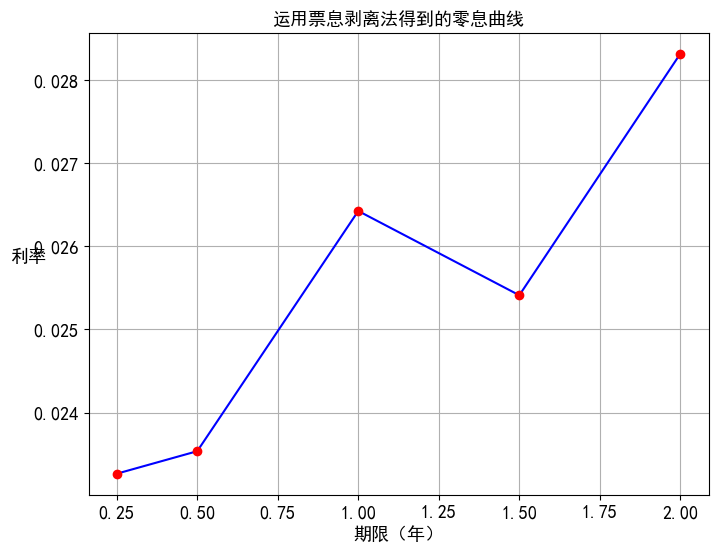

In [21]:
T =np.array([0.25,0.5,1.0,1.5,2.0]) #生成包含五只国债期限的数组
plt.figure(figsize=(8,6))
plt.plot(T,Zero_rates,'b-')
plt.plot(T,Zero_rates,'ro')
plt.xlabel(u'期限（年）',fontsize =13)
plt.xticks(fontsize=13)
plt.ylabel(u'利率',fontsize =13,rotation=0)
plt.yticks(fontsize=13)
plt.title(u'运用票息剥离法得到的零息曲线',fontsize=13)
plt.grid('True')
plt.show()


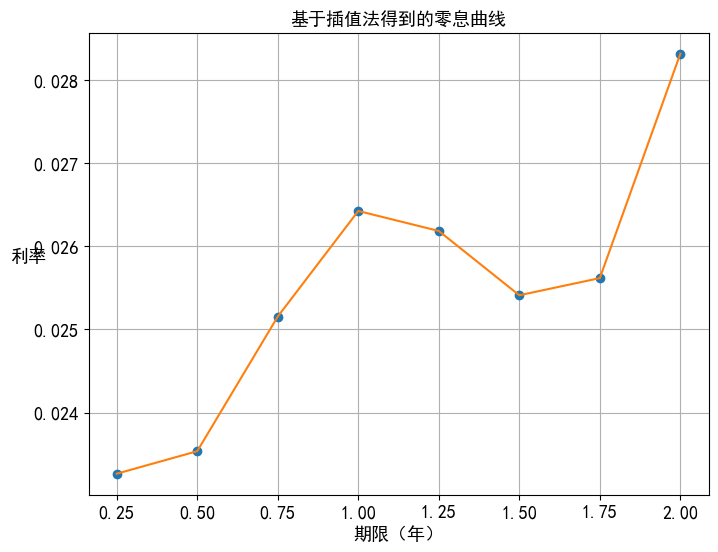

In [23]:
import scipy.interpolate as si
func =si.interp1d(T,Zero_rates,kind='cubic') #运用原有的数据构建一个插值函数，并运用3阶样条曲线插值法
T_new=np.array([0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0]) #生成包含0.75年、1.25年和1.75年的新数据
Zero_rates_new =func(T_new) #计算得到基于插值法的零息利率

plt.figure(figsize=(8,6))
plt.plot(T_new,Zero_rates_new,'o')
plt.plot(T_new,Zero_rates_new,'-')
plt.xlabel(u'期限（年）',fontsize =13)
plt.xticks(fontsize=13)
plt.ylabel(u'利率',fontsize =13,rotation=0)
plt.yticks(fontsize=13)
plt.title(u'基于插值法得到的零息曲线',fontsize=13)
plt.grid('True')
plt.show()

In [24]:
for i in range(len(T_new)):
    print('期限（年）',T_new[i],'零息利率',round(Zero_rates_new[i],6))

期限（年） 0.25 零息利率 0.023268
期限（年） 0.5 零息利率 0.023538
期限（年） 0.75 零息利率 0.025155
期限（年） 1.0 零息利率 0.026424
期限（年） 1.25 零息利率 0.026184
期限（年） 1.5 零息利率 0.025411
期限（年） 1.75 零息利率 0.025617
期限（年） 2.0 零息利率 0.028313


In [26]:
coupon =0.06 #债券票面利率
m =4 #债券票面利率的复利频次
par=100 #债券面值
bond_cashflow=np.ones_like(T_new)*par*coupon/m #生成存放债券票息的数组
bond_cashflow[-1]=par*(1+coupon/m) #将债券本金和最后一期票息加入数组
bond_price=Bond_value(c=bond_cashflow,t=T_new,y=Zero_rates_new) #输入债券的相关信息
print('计算的债券价格',round(bond_price,4))

计算的债券价格 106.1486


In [27]:
def M_Duration(c,y,t):
    '''构建一个计算麦考利久期的函数
    c：表示债券存续期内的现金流，用数组（ndarray)的数据结构输入；
    y：表示债券的到期收益率（连续复利）；
    t：表示对应于产生现金流的时刻，用数组（ndarray）的数据结构输入。'''
    cashflow=[] #建立存放债券每一期现金流现值的列表
    weight=[] #建立存放在债券每一期现金流现值与债券价格比率的列表
    n = len(t)
    for i in np.arange(n):
        cashflow.append(c[i]*np.exp(-y*t[i])) #计算得到债券每一期现金流现值的列表
    for i in np.arange(n):
        weight.append(cashflow[i]/sum(cashflow)) #计算得到每一期现金流现值与债券价格比率的列表
    duration=np.sum(t*weight) #计算得到债券麦考利久期
    return duration #输出债券的麦考利久期

In [28]:
coupon =0.0295 #债券票面利率
par=100 #债券面值
bond_yield=0.038 #债券到期收益率（连续复利）
t_list=np.arange(1,9)/2 #快速生成现金流期限的数组
cashflow=np.ones_like(t_list)*coupon*0.5*par #生成一个不包括到期本金的现金流数组
cashflow[-1]=par*(1+coupon*0.5) #将本金纳入现金流的数组
Duration=M_Duration(c=cashflow,y=bond_yield,t=t_list)
print('13国开09债券的麦考利久期',round(Duration,4))

13国开09债券的麦考利久期 3.7983


In [30]:
def Modi_Duration(c,y,m,t):
    '''构建一个计算修正久期的函数
    c：表示债券存续期内现金流，用数组（ndarray）的数据结构输入；
    y：表示债券的到期收益率，复利频次是m次；
    m：表示复利频次；
    t：表示对应于产生现金流的时刻，用数组的数据结构输入。'''
    cashflow=[] #建立存放债券每一期现金流现值的列表
    weight=[] #建立存放在债券每一期现金流现值与债券价格比率的列表
    n = len(t)
    Rc=m*np.log(1+y/m) #计算对应的连续复利的债券到期收益率
    for i in np.arange(n):
        cashflow.append(c[i]*np.exp(-Rc*t[i])) #计算得到债券每一期现金流现值的列表
    for i in np.arange(n):
        weight.append(cashflow[i]/sum(cashflow)) #计算得到每一期现金流现值与债券价格比率的列表
    duration=np.sum(t*weight) #计算得到债券麦考利久期
    return duration/(1+y/m) #输出债券的麦考利久期


In [32]:
R2=Rm(Rc=bond_yield,m=2) #将连续复利的债券到期收益率转化为每年复利2次的收益率
print('每年复利2次的债券到期收益率',round(R2,6))
Modified_Duration=Modi_Duration(c=cashflow,y=R2,m=2,t=t_list) #计算债券修正久期
print('13国开09债券的修正久期',round(Modified_Duration,4))

每年复利2次的债券到期收益率 0.038363
13国开09债券的修正久期 3.7268


In [33]:
y_continous=Rc(Rm=(R2+0.001),m=2) #将最新的每年复利2次的债券收益率转化为连续复利
print('连续复利的债券到期收益率',round(y_continous,6))

连续复利的债券到期收益率 0.038981


In [34]:
Bond=Bond_price(C=coupon,M=par,T=4,m=2,y=y_continous) #输入13国开09债券的要素
print('运用债券定价公式计算得到13国开09债券的最新债券价格',round(Bond,4))

运用债券定价公式计算得到13国开09债券的最新债券价格 96.3824


In [35]:
def Convexity(c,y,t):
    '''构建一个计算债券凸性的函数
    c：表示债券存续期内现金流，用数组（ndarray）的数据结构输入；
    y：表示债券的到期收益率（连续复利）；
    t：表示对应于产生现金流的时刻，用数组的数据结构输入。'''
    cashflow=[] #建立存放债券每一期现金流现值的列表
    weight=[] #建立存放在债券每一期现金流现值与债券价格比率的列表
    n = len(t)
    for i in np.arange(n):
        cashflow.append(c[i]*np.exp(-y*t[i])) #计算债券每一期现金流现值的列表
    bond_price=sum(cashflow)
    for i in np.arange(n):
        weight.append(cashflow[i]/bond_price) #计算每一期现金流现值与债券价格比率的列表
    convexity=np.sum(weight*t**2) #计算得到债券凸性
    return convexity #输出债券的凸性

Bond_conv=Convexity(c=cashflow,y=bond_yield,t=t_list) #输入债券要素
print('13国开09债券的凸性',round(Bond_conv,4))

13国开09债券的凸性 14.8961
